In [2]:
!pip install seaborn

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel(r"C:\Users\Lenovo\Downloads\train.csv.xlsx")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
df['Age'].value_counts()

Age
24.00    207
22.00     27
18.00     26
28.00     25
30.00     25
        ... 
24.50      1
0.67       1
0.42       1
34.50      1
74.00      1
Name: count, Length: 88, dtype: int64

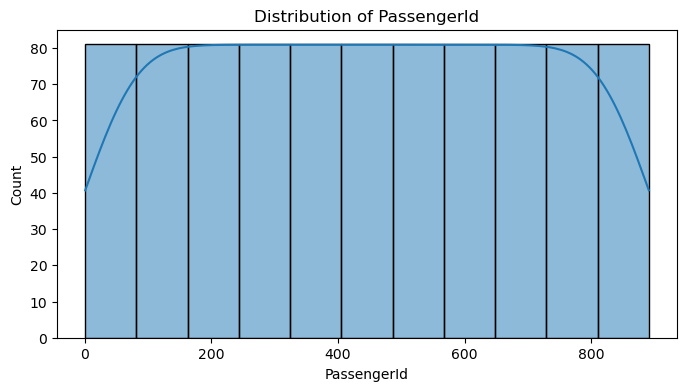

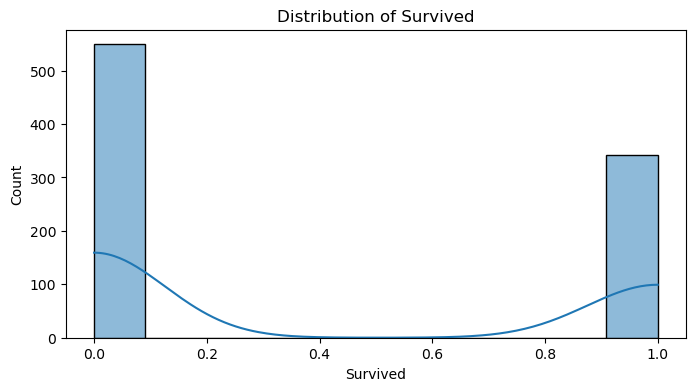

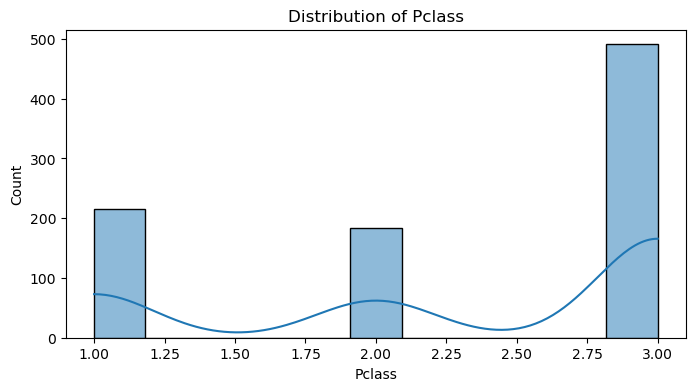

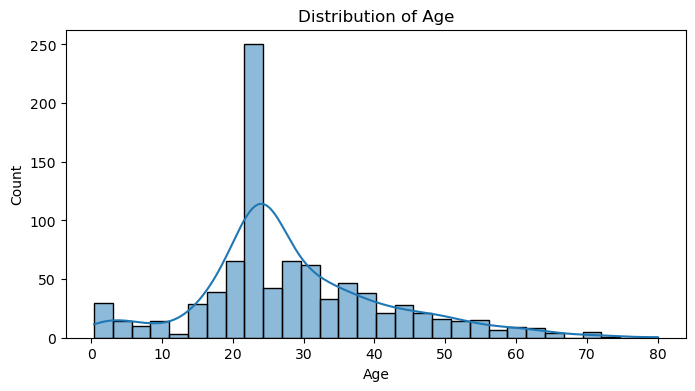

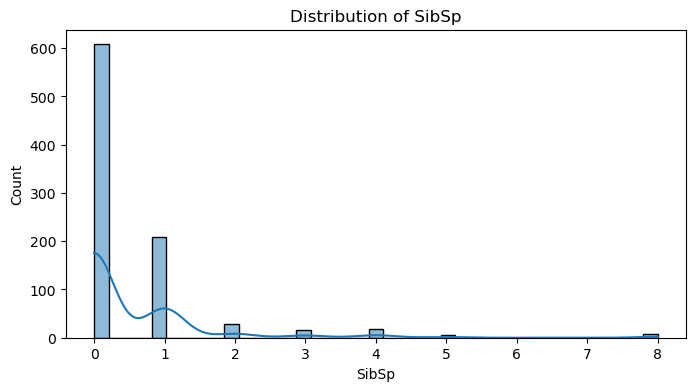

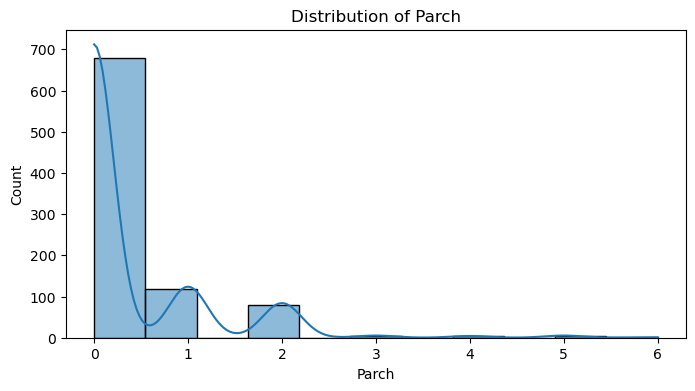

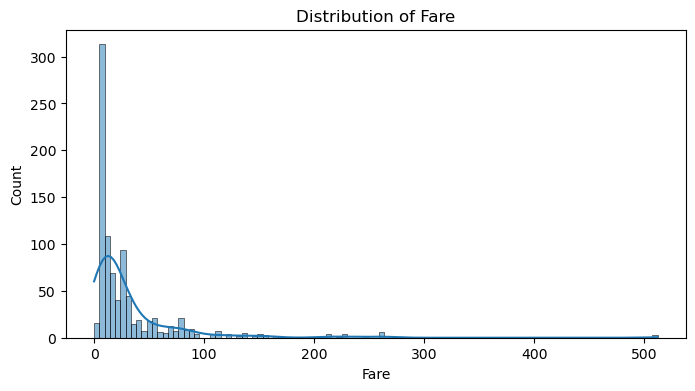

In [16]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

#Each histogram shows the distribution of a numerical column. Note the shape — check if it’s normal, skewed, or has multiple peaks.
#This helps understand how values are spread and if there are unusual patterns.

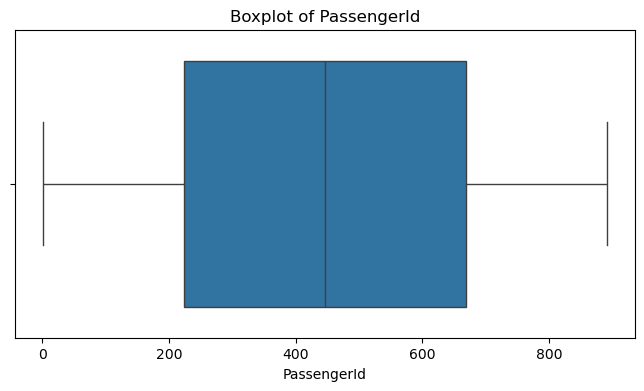

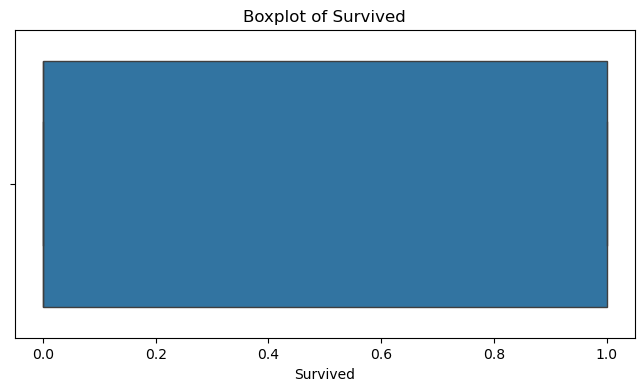

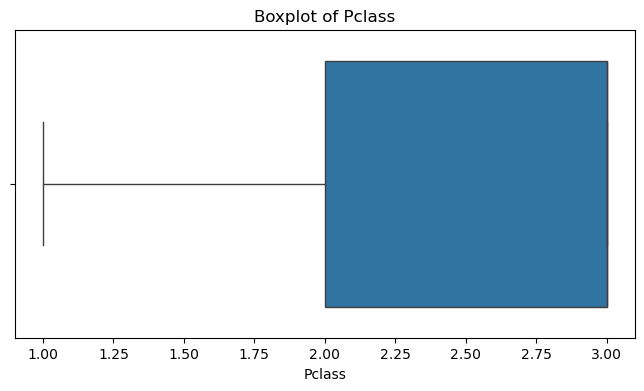

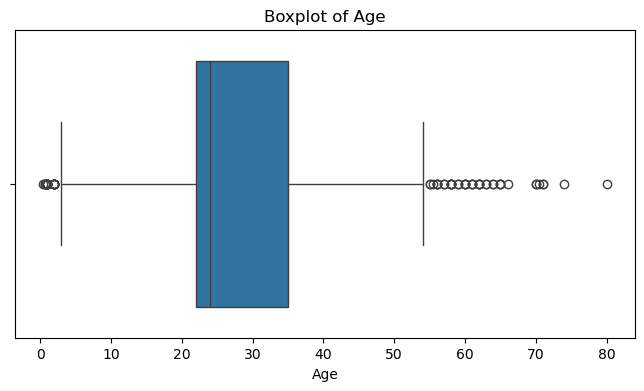

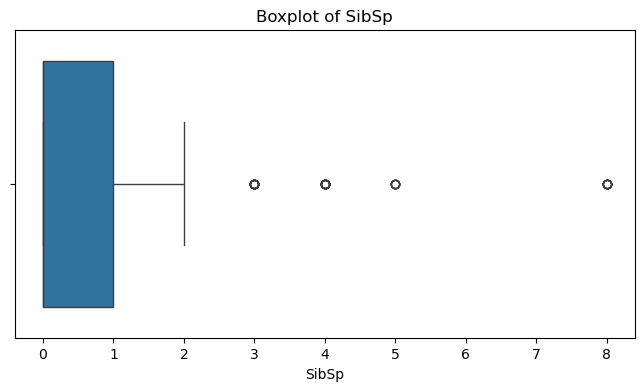

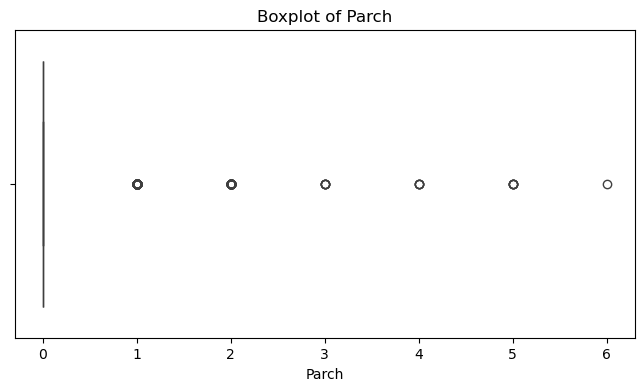

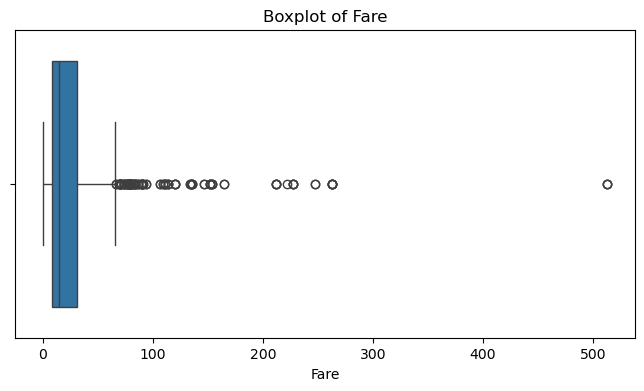

In [17]:
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Each boxplot shows the spread and outliers for each numerical column. 
# Look for whiskers and points outside them — these are possible outliers that might affect your analysis.

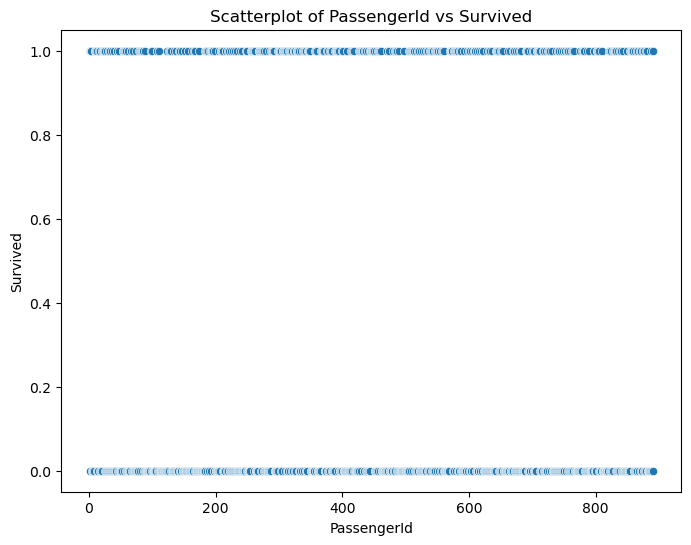

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=num_cols[0], y=num_cols[1])
plt.title(f'Scatterplot of {num_cols[0]} vs {num_cols[1]}')
plt.show()

# The scatterplot compares two numerical columns. Look for trends — 
# e.g.,a positive or negative slope suggests correlation. Check for clusters or unusual patterns.

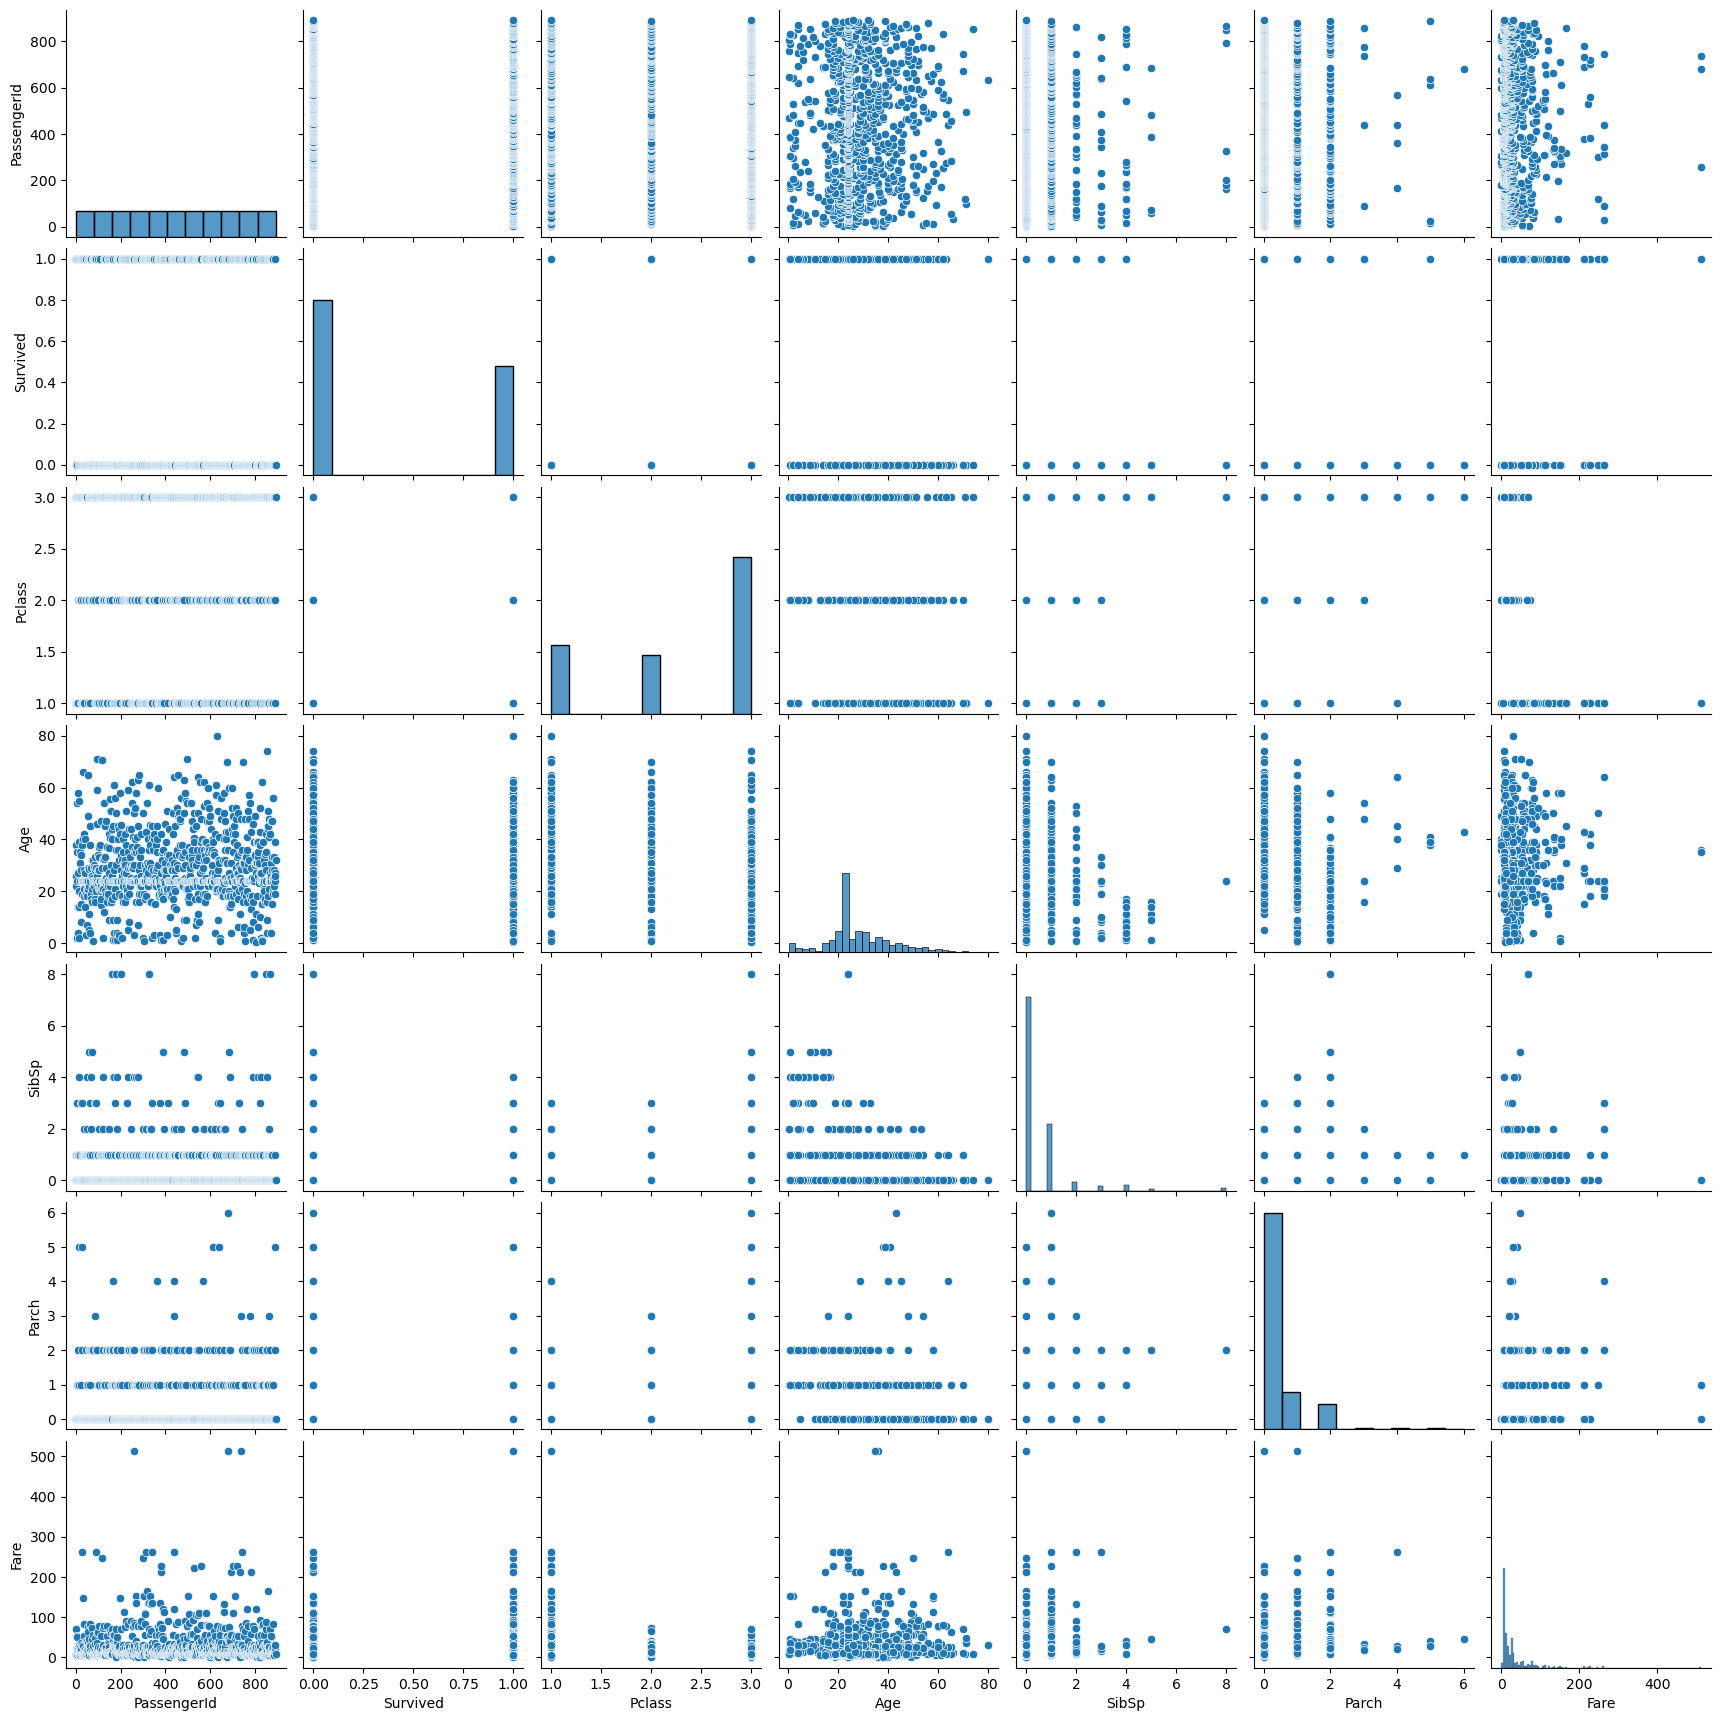

In [23]:
sns.pairplot(df[num_cols])
plt.show()

# The pairplot shows scatterplots for all pairs of numerical columns, plus histograms on the diagonal.
# It helps spot relationships, correlations, and clusters across multiple variable pairs at once.

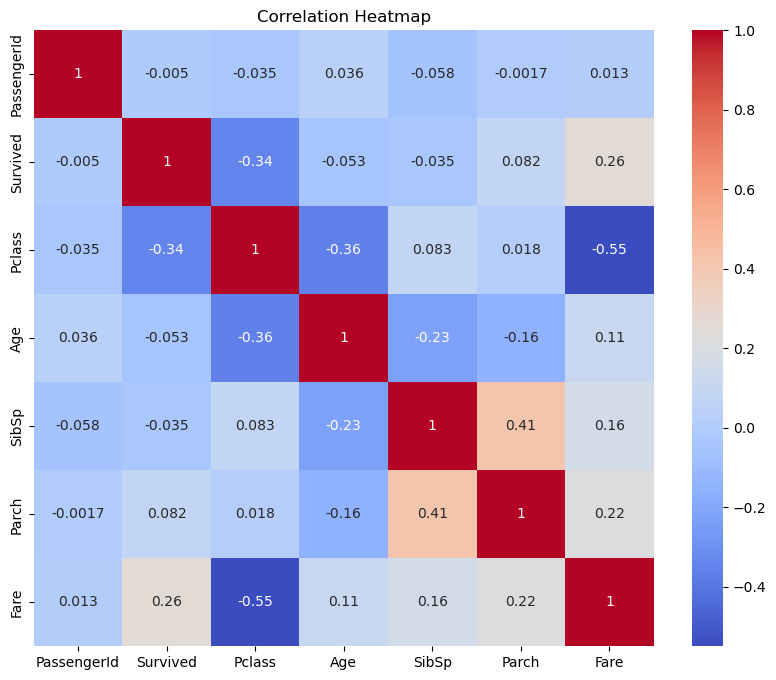

In [24]:
plt.figure(figsize=(10, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# The heatmap shows correlation coefficients between numerical columns. 
# Strong positive (near +1) or negative (near -1) values mean strong relationships.
# This helps choose important variables for deeper analysis.

In [31]:
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036186 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.052872 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.356187  0.083081  0.018443   
Age             0.036186 -0.052872 -0.356187  1.000000 -0.232411 -0.155118   
SibSp          -0.057527 -0.035322  0.083081 -0.232411  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.155118  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.107554  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.107554  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


In [32]:
means = numeric_df.mean() 
print("\nMeans of Numerical Columns:")
print(means)


Means of Numerical Columns:
PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             28.566970
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64


In [33]:
medians = numeric_df.median() 
print("\nMedians of Numerical Columns:")
print(medians)


Medians of Numerical Columns:
PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             24.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64
